In [1]:
import numpy as np # This wont be used for the question its not asked for!!!
import matplotlib.pyplot as plt
import cv2

##### Code from Ass1 for reference

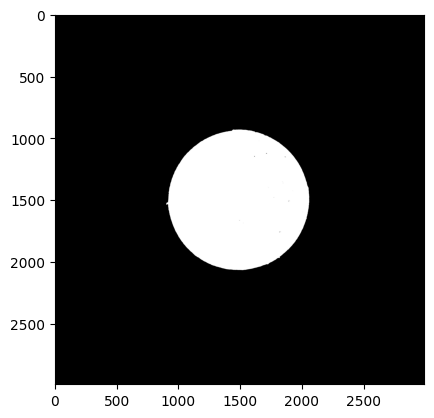

pixel radius = 567.069754244368
Image Radius in cm = 1.4214649588344788


In [3]:
circle_15cm_filled = "../Ass1/15cm_circle_filled.jpg"
circle_30cm_filled = "../Ass1/30cm_circle_filled.jpg"
circle_8cm_filled = "../Ass1/8cm_circle_filled.jpg"

circle_15cm_filled_matrix = cv2.imread(circle_15cm_filled)
circle_30cm_filled_matrix = cv2.imread(circle_30cm_filled)
circle_8cm_filled_matrix = cv2.imread(circle_8cm_filled)

circle_15cm_filled_gray = cv2.cvtColor(circle_15cm_filled_matrix, cv2.COLOR_BGR2GRAY)
circle_30cm_filled_gray = cv2.cvtColor(circle_30cm_filled_matrix, cv2.COLOR_BGR2GRAY)
circle_8cm_filled_gray = cv2.cvtColor(circle_8cm_filled_matrix, cv2.COLOR_BGR2GRAY)

# Isolating the circle

manual_threshold = 50

thresholed_8cm = []

for i in circle_8cm_filled_gray:
    row = []
    for j in i:
        if j > manual_threshold:
            row.append(j)
        else:
            row.append(0)
    thresholed_8cm.append(row)

plt.imshow(thresholed_8cm,cmap="gray")

thresholed_8cm = np.array(thresholed_8cm)

start_pixel = 700
end_pixel = 700
width = 1500

isolated_circle_8cm = np.zeros(np.shape(thresholed_8cm), dtype=thresholed_8cm.dtype)

for i in range(start_pixel, start_pixel + width):
    for j in range(end_pixel, end_pixel + width):
        if thresholed_8cm[i, j] < 50:
            isolated_circle_8cm[i, j] = 255

plt.imshow(isolated_circle_8cm, cmap="gray")
plt.show()

# Get area of the circle

circle_pixels = 0

for i in isolated_circle_8cm:
    for j in i:
        if j != 0:
            circle_pixels += 1

r = np.sqrt(circle_pixels/np.pi) # pixels
"""
Actual Radius = 1.35cm
2992pixel = 7.5cm
"""
print("pixel radius =",r)

multiplier = 7.5/2992 # cm/pixels
radius = multiplier * r # cm

print("Image Radius in cm =",radius)


## Question 1

In [4]:
# Calculating DPI

length_of_image_cm = 7.5 # cm
length_of_image_inch = length_of_image_cm / 2.54 # inch
dpi = 2992 / length_of_image_inch # pixels/inch
print("DPI of the image is =",dpi)

DPI of the image is = 1013.2906666666667


--------

## Question 2

In [72]:
page = cv2.imread("Number_of_Lines_Assignment_02.jpg")
page_gray = cv2.cvtColor(page, cv2.COLOR_BGR2GRAY)
page_gray = np.array(page_gray)
print("Shape of the image =",np.shape(page_gray))

Shape of the image = (3300, 2550)


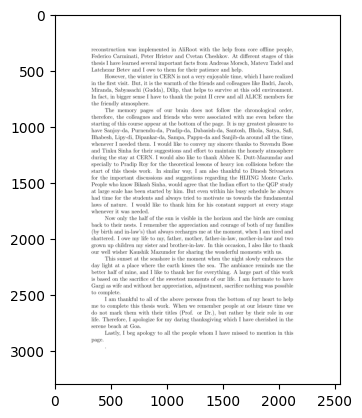

In [ ]:
plt.imshow(page_gray, cmap='gray')

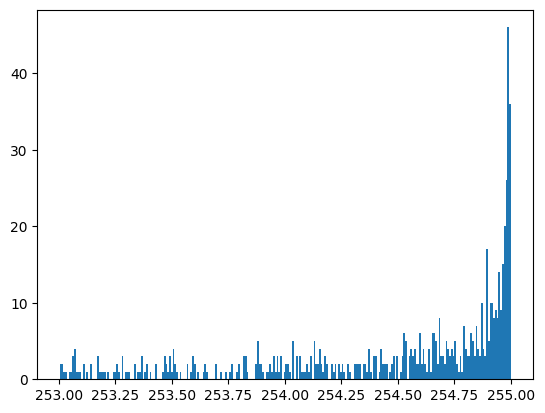

In [51]:
# plot the bar graph of mean of each row in page_gray
mean_of_rows = np.mean(page_gray, axis=1)
# plt.hist(mean_of_rows[np.where(mean_of_rows != 255.0)], bins=256)
plt.hist(mean_of_rows[np.where((mean_of_rows > 253.0) & (mean_of_rows != 255.0))], bins=256)
plt.show()

#### A Crude implementation
Problem with this is some lines contain only 1-5 words, thus the mean comes out to be very close to 255 (Actual no words row)

Thus the algorithm will get +-4 or 5 lines error

To make the algorithm better, we need to strengthen the lines with text

In [65]:
# 44 actual lines in the image
black_lines = 0
prev_mean = 0

for i in page_gray:
    count = 0
    # calc mean
    mean = np.mean(i)

    if mean < 254.75:
        if prev_mean > 254.75:
            black_lines += 1
    prev_mean = mean
print("Number of black lines in the image =",black_lines)

Number of black lines in the image = 46


#### Better implementation

In [ ]:
kernel_3x3 = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])
kernel_5x5 = np.array([
    [0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0]
])
kernel_7x7 = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0]
])

def convolve2d(image, kernel):
    kh, kw = kernel.shape
    ih, iw = image.shape
    
    output = np.zeros((ih - kh + 1, iw - kw + 1))

    for i in range(ih - kh + 1):
        for j in range(iw - kw + 1):
            region = image[i:i+kh, j:j+kw]
            output[i, j] = np.sum(region * kernel)

    return output

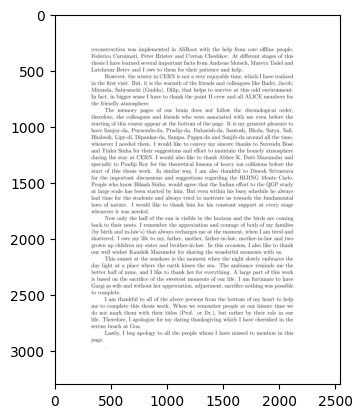

In [74]:
convolved_image_3x3 = convolve2d(page_gray, kernel_3x3)
plt.imshow(convolved_image_3x3, cmap='gray')

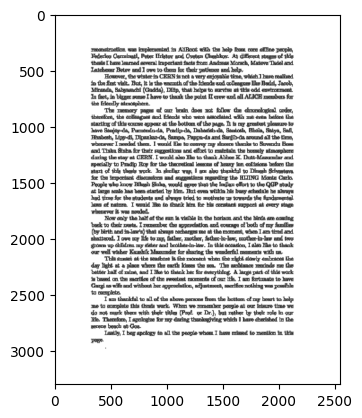

In [82]:
page_gray_thrs = page_gray.copy()

for i in page_gray_thrs:
    for j in range(len(i)):
        if i[j] < 255:
            i[j] = 0
        else:
            i[j] = 255

plt.imshow(page_gray_thrs, cmap='gray')

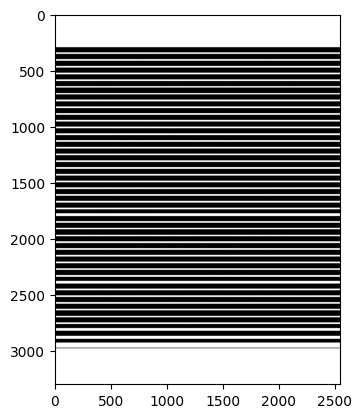

In [87]:
page_gray_lines = page_gray.copy()

for i in page_gray_lines:
    min_val = np.min(i)
    if min_val < 127:
        for j in range(len(i)):
            i[j] = 0

plt.imshow(page_gray_lines, cmap='gray')

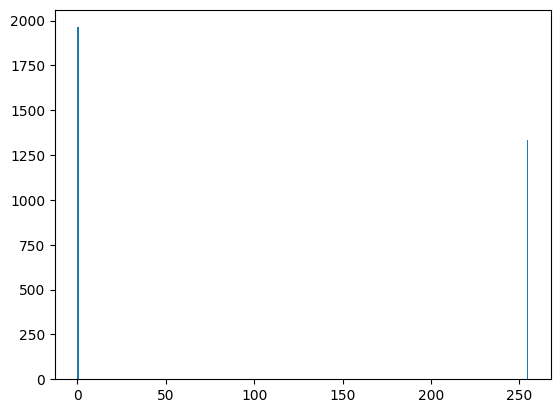

In [ ]:
# plot the bar graph of mean of each row in page_gray
mean_of_rows = np.mean(page_gray_lines, axis=1)
plt.hist(mean_of_rows, bins=256)
plt.show()

In [96]:
# 44 actual lines in the image
black_lines = 0
prev_mean = 0

for i in page_gray_lines:
    count = 0
    # calc mean
    mean = np.mean(i)
    # print("Mean of the row =",mean)

    if mean == 0.0:
        if prev_mean > 250.75:
            black_lines += 1
    prev_mean = mean
print("Number of black lines in the image =",black_lines)

Number of black lines in the image = 45


----

## Question 3

----

## Question 4

----

## Question 5